# **Installs**

In [ ]:
! pip install scikit-video

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.5 MB/s eta 0:00:00


# Download **Video Data**

In [ ]:
#downloading video data
import skvideo.io
import numpy as np
video_array = skvideo.io.vread("/content/drive/MyDrive/494 videos/monte_carlo_low (1).mp4")

In [ ]:
video_array.shape

(379, 540, 960, 3)

In [ ]:
#reshaping data to see frames
for frame in video_array:
    print(frame.shape)

(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 

In [ ]:
#len(video_array)# 

In [ ]:
#np.shape(np.stack(video_array,axis=-1))

In [ ]:
#np.stack(video_array,axis=0)


# Convert to **Grayscale** and create **Collumn Matrix**

In [ ]:
#convert to grayscale to manipulate data easier
video_array_gray = skvideo.utils.rgb2gray(video_array)
print(video_array_gray)

video_array_gray.shape

[[[[ 16.6393]
   [ 16.6393]
   [ 16.6393]
   ...
   [ 60.9939]
   [ 61.9938]
   [ 61.9938]]

  [[ 18.6391]
   [ 18.6391]
   [ 18.6391]
   ...
   [ 66.9933]
   [ 66.9933]
   [ 66.9933]]

  [[ 22.6387]
   [ 22.6387]
   [ 22.6387]
   ...
   [ 78.9921]
   [ 78.9921]
   [ 78.9921]]

  ...

  [[100.3581]
   [100.3581]
   [100.3581]
   ...
   [162.8079]
   [162.8079]
   [152.8089]]

  [[101.1839]
   [101.1839]
   [101.1839]
   ...
   [164.4056]
   [166.4054]
   [164.4056]]

  [[101.1839]
   [101.1839]
   [101.1839]
   ...
   [164.4056]
   [161.4059]
   [160.406 ]]]


 [[[ 17.6392]
   [ 17.6392]
   [ 17.6392]
   ...
   [ 61.9938]
   [ 61.9938]
   [ 61.9938]]

  [[ 19.639 ]
   [ 19.639 ]
   [ 19.639 ]
   ...
   [ 71.9928]
   [ 71.9928]
   [ 71.9928]]

  [[ 24.6385]
   [ 24.6385]
   [ 24.6385]
   ...
   [ 82.9917]
   [ 82.9917]
   [ 82.9917]]

  ...

  [[100.3581]
   [100.3581]
   [100.3581]
   ...
   [163.8078]
   [165.8076]
   [157.8084]]

  [[101.1839]
   [101.1839]
   [101.1839]
   ...
   [1

(379, 540, 960, 1)

In [ ]:
#creating the data matrix
c = []
for frame in video_array_gray:
    b=frame.reshape((540*960))
    c.append(b)
    
print(np.shape(c))

data = np.transpose(c)
  
print(np.shape(data))

print(data)


#Apply **SVD** and use **Frobinues norms** to get low rank data

In [ ]:
#calculating SVD of data matrix
u, s, vh = np.linalg.svd(data, full_matrices=False)
u.shape, s.shape, vh.shape

((518400, 379), (379,), (379, 379))

In [ ]:
np.save('u.npy', u)
np.save('s.npy', s)
np.save('vh.npy', vh)

In [ ]:
import numpy as np
u = np.load("u.npy")
s = np.load("s.npy")
vh = np.load("vh.npy")


In [ ]:
print(np.shape(s))
print(s[1])

(379,)
210486.54302614197


In [ ]:
#finding the energy by taking the error of 2 frobinius norms to find our low rank
#gives you optimal rank r
r=0
energy=0
while energy<= 0.99999:
  energy  = energy + (s[r]**2)/np.sum(np.square(s))
  r+=1
print(r)

156


In [ ]:
#to find low rank A, we take the original matrix and multiply it by the U* of r matrix(dot product)
def lowRankSVD(R: int, U: np.ndarray, A):
  return np.dot(np.transpose(U[:,:R]),A) 

A_low_rank = lowRankSVD(156, u, data)

In [ ]:
print(A_low_rank)

[[-9.63626770e+04 -9.63760039e+04 -9.63663412e+04 ... -9.59760283e+04
  -9.59785950e+04 -9.59210063e+04]
 [-8.81453668e+03 -8.84194639e+03 -8.84233649e+03 ...  1.28169901e+04
   1.28218511e+04  1.31265049e+04]
 [-7.39390238e+03 -6.76405526e+03 -6.76403681e+03 ...  5.50829816e+02
   5.51123008e+02  2.54139050e+02]
 ...
 [ 1.89102493e+02 -7.54752765e+01 -7.62628747e+01 ...  8.75283152e+00
   7.09446514e+00 -2.96551035e+00]
 [ 3.14798571e+00 -1.04572050e+01 -1.01682075e+01 ...  1.25093723e+01
   1.36115119e+01 -8.15182798e+00]
 [-2.69512139e+00  5.83881036e+00  6.76416545e+00 ... -7.84955445e+00
  -5.92513781e+00  2.87341541e+01]]


# Find **X** and **Y** low rank Matrices and **DMD**

In [ ]:
#X is the new low rank matrix A minus its final collumn
X = np.delete(A_low_rank,-1,1)
print(X)

[[-9.63626770e+04 -9.63760039e+04 -9.63663412e+04 ... -9.59763862e+04
  -9.59760283e+04 -9.59785950e+04]
 [-8.81453668e+03 -8.84194639e+03 -8.84233649e+03 ...  1.28164806e+04
   1.28169901e+04  1.28218511e+04]
 [-7.39390238e+03 -6.76405526e+03 -6.76403681e+03 ...  5.48105253e+02
   5.50829816e+02  5.51123008e+02]
 ...
 [ 1.89102493e+02 -7.54752765e+01 -7.62628747e+01 ...  9.60002653e+00
   8.75283152e+00  7.09446514e+00]
 [ 3.14798571e+00 -1.04572050e+01 -1.01682075e+01 ...  1.31598647e+01
   1.25093723e+01  1.36115119e+01]
 [-2.69512139e+00  5.83881036e+00  6.76416545e+00 ... -7.96982446e+00
  -7.84955445e+00 -5.92513781e+00]]


In [ ]:
#Y is the new low rank matrix A minus its first collumn
Y = np.delete(A_low_rank,0,1)
print(Y)

[[-9.63760039e+04 -9.63663412e+04 -9.63661116e+04 ... -9.59760283e+04
  -9.59785950e+04 -9.59210063e+04]
 [-8.84194639e+03 -8.84233649e+03 -8.84225114e+03 ...  1.28169901e+04
   1.28218511e+04  1.31265049e+04]
 [-6.76405526e+03 -6.76403681e+03 -6.76488155e+03 ...  5.50829816e+02
   5.51123008e+02  2.54139050e+02]
 ...
 [-7.54752765e+01 -7.62628747e+01 -7.62384908e+01 ...  8.75283152e+00
   7.09446514e+00 -2.96551035e+00]
 [-1.04572050e+01 -1.01682075e+01 -1.01385210e+01 ...  1.25093723e+01
   1.36115119e+01 -8.15182798e+00]
 [ 5.83881036e+00  6.76416545e+00  6.75927788e+00 ... -7.84955445e+00
  -5.92513781e+00  2.87341541e+01]]


In [ ]:
#psuedo invers of X
psuX = np.linalg.pinv(X)
print(psuX)

[[-1.79521028e-08 -3.05769523e-07 -7.88171770e-07 ...  9.69425545e-06
   3.53184639e-07 -9.52152861e-07]
 [ 5.89658601e-08 -1.12404887e-06 -7.95702085e-07 ... -3.37575608e-06
   8.69126689e-07 -6.11355253e-06]
 [-7.99723125e-08  3.52851662e-07 -6.62310122e-07 ... -4.16947142e-06
  -1.47192880e-06  4.40105960e-06]
 ...
 [ 3.60479218e-07 -3.83897636e-06 -3.15140313e-07 ...  2.59574350e-06
   7.35417053e-06 -2.97830843e-05]
 [ 2.24890136e-07 -2.39768430e-06 -1.84681300e-07 ...  1.81716908e-06
   5.01548251e-06 -1.95792173e-05]
 [-6.38375486e-07  6.77872426e-06  6.44125353e-07 ... -2.94940999e-06
  -9.57014566e-06  4.54709465e-05]]


In [ ]:
np.save('Y.npy', Y)
np.save('psuX.npy', psuX)


In [ ]:
#import numpy as np
#Ys = np.load("Y.npy")
#psuX = np.load("psuX.npy")


In [ ]:
print(psuX.shape)
print(Y.shape)

(378, 156)
(156, 378)


In [ ]:
#multiply the Y matrix by the psuedo inverse of X to get the DMD
DMD = np.matmul(Y,psuX) 
print(DMD)



[[ 9.99136742e-01  7.82064786e-03  1.09083006e-03 ...  9.04110611e-04
  -1.72240443e-02  5.69744836e-02]
 [-1.03118498e-03  1.00536287e+00  2.38654625e-02 ... -1.50573657e-03
  -3.67057706e-03  2.99421891e-02]
 [-2.46001972e-04 -6.06538806e-03  9.93227275e-01 ... -2.18424986e-03
   1.44522189e-02  7.28417718e-02]
 ...
 [ 6.29372370e-05 -5.76767019e-04  1.48157576e-04 ...  1.60016814e-01
   1.17871441e-01 -1.34206423e-01]
 [-3.88736757e-04  4.13021758e-03  4.43081543e-04 ... -6.75153850e-02
   1.29306494e-01 -7.94761350e-02]
 [ 5.74272864e-03 -6.10440451e-02 -5.55748196e-03 ...  4.81593774e-02
   6.42086696e-02  6.00841488e-02]]


In [ ]:
np.save("A.npy",DMD)

In [ ]:
DMD=np.load("A.npy")

# Apply **DMD** to find eigenvalues and eigenvectors

In [ ]:
#Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(DMD)

print(eigenvalues)
print(eigenvectors)

In [ ]:
#**List**
#matrix of eignevectors * matrix of bp = first frame of low rank A (which is first collume of it) **just inverse**
#solving this to get matrix of bp
#then use to get general decomposition formula pg 22
##sort eigenvalues and eigenvectors to determine what eigenvectors and eigenvectors make up foreground and background (lamda>0.1) in logorithmic form its easier to seperate 
#produce foreground and background matrices

In [ ]:
eigvecinverse = np.linalg.inv(eigenvectors) 

In [ ]:
frame1= A_low_rank[:, 0]
print(frame1)

In [ ]:
matrix_C = np.matmul(eigvecinverse,frame1)
print(matrix_C)
#values on the diagonal!

In [ ]:
#calculate fastdmd
#subtract fastdmd from Xdmd to get slowdmd
#done!

In [ ]:
#Compute eigen decomposition matrix:

#Part 1 - The set up
import math

#R = 156 - optimal p-rank
#N = 379 - total frames

C = matrix_C.reshape(156,1)
E = eigenvalues.reshape(156,1)
Zn = np.empty([156,379], dtype = np.cdouble)
#Zn.reshape(59124,1)
decomp = np.empty([156,1], dtype = np.cdouble)
#defining number of rows as p-rank and number of columns as frames

decomp.reshape(156,1)

print(decomp.shape)
print(decomp.dtype)
print(E.shape)
print(C.shape)
print(eigenvectors.shape)
print(Zn.shape)
print(Zn.dtype)




(156, 1)
complex128
(156, 1)
(156, 1)
(156, 156)
(156, 379)
complex128


In [ ]:
# Part 2: 
#using the Zn formula on page 15 of textbook [2]
#r = 0
#n = 1

for n in range(379):
    for r in range(155): #as the first row is 0
        #print(eigenvectors[:,r]) #to check whether the slicing is 'good'
        #using [r+1] as it is the only way to get around ValueError: could not broadcast input array from shape (156,156) into shape (156,)
        decomp = decomp + (((E[r+1])**(n+1))*(C[r+1])*eigenvectors[:,[r+1]]) 
    Zn[:,[n]] = decomp
    #to initialize next column of Zn
    decomp = np.empty([156,1]) 

np.save('Zn.npy', Zn)    

print(Zn.shape)
print(Zn)

(156, 379)
[[-9.63765038e+04+3.03601588e-12j -9.63754129e+04+1.48803192e-12j
  -9.63692626e+04-1.23263205e-12j ... -9.83522350e+04+2.21796405e-08j
  -9.85900488e+04+1.92458267e-08j -9.88363013e+04+1.61333426e-08j]
 [-8.84149725e+03+1.23911992e-11j -8.93326918e+03+9.99336031e-12j
  -9.04438651e+03+7.09289572e-12j ...  1.37181256e+04+5.33458293e-08j
   1.35454488e+04+5.14054239e-08j  1.33622711e+04+4.92512537e-08j]
 [-6.76563321e+03-1.53499435e-12j -6.69106529e+03-5.29631894e-12j
  -6.61188181e+03-7.78428710e-12j ...  1.42238437e+03-6.33581876e-08j
   1.91506574e+03-5.71361967e-08j  2.42447010e+03-5.04940448e-08j]
 ...
 [-7.54952106e+01-9.96447369e-12j -3.54309206e+01+1.31850086e-12j
  -1.58522378e+01+4.74464912e-12j ... -9.80732488e+02-7.80502215e-09j
  -1.03945091e+03-8.86984404e-09j -1.09856168e+03-9.96032606e-09j]
 [-1.00409479e+01+8.91553498e-12j -6.92593829e+00+6.04138961e-12j
  -3.30902533e+00+3.13948867e-12j ... -7.78249104e+02-6.56732849e-09j
  -8.22956989e+02-7.38970641e-09j -8

In [ ]:
print(Zn)

In [ ]:
np.save('Zn.npy',Zn)
np.save('E.npy',E)
np.save('c.npy',C)

In [ ]:
Zn=np.load('Zn.npy')
E=np.load('E.npy')
C=np.load('c.npy')

#Construction of the foreground and background 

In [ ]:
#My learning curve for plotting

#np.absolute(eigenvalues.real)
#import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt, patches

#plt.rcParams["figure.figsize"] = [7.00, 7.50]
#plt.rcParams["figure.autolayout"] = True

#eig=np.log(np.absolute(eigenvalues.real))
#plt.scatter(eig,eig)


#fig = plt.figure()
#ax = fig.add_subplot()
#circle1 = patches.Circle((0, 0), radius=1, color='black',fill= False)
#ax.add_patch(circle1)
#ax.axis('equal')


#plt.xlabel("Eigenvalues")
#plt.ylabel("Weight")

#plt.show()

In [ ]:
#importing necessary package for plotting:

import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import margins

In [ ]:
#Determining the cutoff of eigevalues 
 
#frames/second
delta_t = 379/6

omega = np.abs(np.log(E))/delta_t
omega_prime = np.log(E)/delta_t

print(omega.shape)
print(omega)

print(omega_prime.shape)
print(omega_prime)

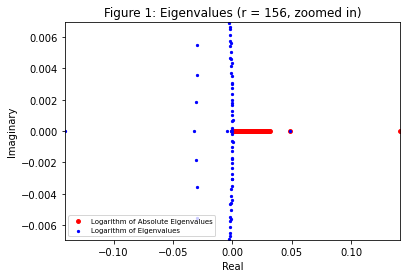

In [ ]:
#Plotting the eigenvalues without the cutoff
#This is to observe what we will be cutting off

plt.scatter(omega.real, omega.imag, marker='o', c = 'red', s = 15, label = 'Logarithm of Absolute Eigenvalues')
plt.scatter(omega_prime.real, omega_prime.imag, marker='o', c = 'blue', s = 5, label = 'Logarithm of Eigenvalues')

#This line controls the zooming 
plt.margins(x=0,y=-0.25) 

plt.title("Figure 1: Eigenvalues (r = 156, zoomed in)")
plt.xlabel("Real")
plt.ylabel("Imaginary")

plt.legend(loc='lower left',prop={'size':7})

plt.show()

In [ ]:
#Cutting off the eigenvalue:
#The cut off is at 0.0001, considering the clustering of the eigenvalues at 0
#separating the eigendecompositional matrix into fast and slow modes

fast = np.zeros([156,1])
slow = np.zeros([156,1])
#empty array designated towards including 'fast' modes

fast_index = 0
slow_index = 0
i = 0

slow_position = 0

for element in omega:
    if element > 0.0001:
        fast[fast_index] = element
        fast_index = fast_index + 1
        i += 1
    else:
        slow[slow_index] = element
        slow_index = slow_index + 1
        slow_position = i
        i += 1
        
print(fast_index, slow_index)
print(fast)
print(slow)
print(i)
print("The index of the slow mode is: ", slow_position)
print("The slow mode is the 9th element in omega")
#this means that the element with index 8 in the coefficient matrix is the coefficient for the slow eigendecomposition

In [ ]:
#Reconstruction the foreground and background

#Part 1:The Foreground = X_fast

import copy
fast_C = copy.deepcopy(C)
fast_C[8] = 0

print(fast_C)
print(fast_C[8])
print(C[8])

Zn_fast = np.empty([156,379], dtype = np.cdouble)
decomp_new = np.empty([156,1], dtype = np.cdouble)
#defining number of rows as p-rank and number of columns as frames
decomp_new.reshape(156,1)

for n in range(379):
    for r in range(155): 
        #using [r+1] as it is the only way to get around ValueError: could not broadcast input array from shape (156,156) into shape (156,)
        decomp_new = decomp_new + (((E[r+1])**(n+1))*(fast_C[r+1])*eigenvectors[:,[r+1]]) 
    Zn_fast[:,[n]] = decomp_new
    #to initialize next column of Zn_fast
    decomp_new = np.empty([156,1]) 

print(Zn.shape)
print(Zn_fast.shape)
print(Zn_fast)

In [ ]:
 #Part 2: The Background = X_slow

Zn_slow = np.subtract(Zn, Zn_fast)

print(Zn_slow.shape)
print(Zn_slow)

(156, 379)
[[  8.17992934+3.74794967e+001j -10.66914408+2.47565611e+001j
  -16.22783222+9.77372141e+000j ...   0.        +0.00000000e+000j
    0.        +0.00000000e+000j   0.        +0.00000000e+000j]
 [ 70.84987595+4.18237873e+001j  23.34963562+5.28907596e+001j
   -8.31252327+3.97688930e+001j ...   0.        +0.00000000e+000j
    0.        +0.00000000e+000j   0.        +0.00000000e+000j]
 [ 48.91925043+5.28528553e+001j   6.30833912+5.02136742e+001j
  -16.9506869 +3.12642152e+001j ...   0.        +0.00000000e+000j
    0.        +0.00000000e+000j   0.        +0.00000000e+000j]
 ...
 [-37.4910431 +1.61052099e+001j -28.00721821-6.14695536e+000j
  -13.48156597-1.49753553e+001j ...   0.        +0.00000000e+000j
    0.        +0.00000000e+000j   0.        +0.00000000e+000j]
 [ -7.18126758-2.28145423e+001j   5.23676075-1.59711658e+001j
    9.52872515-6.97915155e+000j ...   0.        +0.00000000e+000j
    0.        +0.00000000e+000j   0.        +0.00000000e+000j]
 [ 61.18656515-3.95597803e+20

In [ ]:
##CONSTRUCTING THE R MATRIX 

#Part 1:

absZn_slow = np.abs(Zn_slow)
LabsZn_slow = np.zeros([518400, 379])

for i in range(379):
    for j in range(156):
        LabsZn_slow[j][i] = absZn_slow[j][i]

print(LabsZn_slow.shape)
print(LabsZn_slow)

(518400, 379)
[[38.3617507  26.9577067  18.94381611 ...  0.          0.
   0.        ]
 [82.27353224 57.81555094 40.62835081 ...  0.          0.
   0.        ]
 [72.01747962 50.60838095 35.56370253 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
#Part 2:

#print(data)
sparse = np.subtract(data,LabsZn_slow)
#must subtract the slow from the transposed video data

print(sparse.shape)
print(sparse)

R = np.zeros([518400,379], dtype = 'float')

for j in range(379):
    for l in range(156):
        if sparse[l][j] < 0.00:
            R[l][j] = sparse[l][j] #double indices due to 2-D array
    
print(R.shape)
print(R)

(518400, 379)
[[-21.7224507   -9.3185067   -1.30461611 ...  24.7094      24.7094
   24.7094    ]
 [-65.63423224 -40.17635094 -22.98915081 ...  24.7094      24.7094
   24.7094    ]
 [-55.37817962 -32.96918095 -17.92450253 ...  25.7093      25.7093
   25.7093    ]
 ...
 [164.4056     164.4056     164.4056     ... 160.406      160.406
  160.406     ]
 [161.4059     161.4059     161.4059     ... 160.406      160.406
  160.406     ]
 [160.406      159.4061     159.4061     ... 160.406      160.406
  160.406     ]]
(518400, 379)
[[-21.7224507   -9.3185067   -1.30461611 ...   0.           0.
    0.        ]
 [-65.63423224 -40.17635094 -22.98915081 ...   0.           0.
    0.        ]
 [-55.37817962 -32.96918095 -17.92450253 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.  

In [ ]:
##FINALIZING SLOW AND FAST MODES:

lowrank = np.add(R, LabsZn_slow)

#as described in the methodology
final_sparse = np.subtract(sparse, R) 

print(lowrank.shape)
print(lowrank)
print(final_sparse.shape)
print(final_sparse)

(518400, 379)
[[16.6393 17.6392 17.6392 ...  0.      0.      0.    ]
 [16.6393 17.6392 17.6392 ...  0.      0.      0.    ]
 [16.6393 17.6392 17.6392 ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]
(518400, 379)
[[  0.       0.       0.     ...  24.7094  24.7094  24.7094]
 [  0.       0.       0.     ...  24.7094  24.7094  24.7094]
 [  0.       0.       0.     ...  25.7093  25.7093  25.7093]
 ...
 [164.4056 164.4056 164.4056 ... 160.406  160.406  160.406 ]
 [161.4059 161.4059 161.4059 ... 160.406  160.406  160.406 ]
 [160.406  159.4061 159.4061 ... 160.406  160.406  160.406 ]]


#Reconstruction of video and print

In [ ]:
np.save('lowrank.npy',lowrank)
np.save('final_sparse.npy',final_sparse)

In [ ]:
lowrank=np.load('lowrank.npy')
final_sparse=np.load('final_sparse.npy')

In [ ]:
##RECONSTRUCTING VIDEO:

#now, lowrank and final_sparse should no longer contain negative values

print(data.shape)
print(data)

RECON_VIDEO = np.add(lowrank, final_sparse)

print(RECON_VIDEO.shape)
print(RECON_VIDEO)

In [ ]:
from PIL import Image as im

In [ ]:
#Frame Images of reconstructed video

RECON_IM1 = RECON_VIDEO[:,[370]]
RECON_IM1.shape
RECON_IM1 = RECON_IM1.reshape(540,960)
#RECON_IM1 = RECON_IM1.astype('uint8')

IM1 = im.fromarray(RECON_IM1)
IM1 = IM1.convert("L") #solves OSError: cannot write mode F as PNG

IM1.save("IM1.png") 

In [ ]:
##RECONSTRUCTING THE FRAMES:

VIDEO = np.transpose(RECON_VIDEO)

print(VIDEO.shape)


In [ ]:
np.save('video.npy',VIDEO)

In [ ]:
import numpy as np
import skvideo.io

lowrank=np.load('lowrank.npy')
final_sparse=np.load('final_sparse.npy')

In [ ]:
VIDEO = np.load('video.npy')

In [ ]:
Lowrank = np.transpose(lowrank)
Lowrank.shape
Final_sparse = np.transpose(final_sparse)

In [ ]:
##PRINTING THE FRAMES FROM THE MATRICES:
print(lowrank)
print(final_sparse)



In [ ]:
#(379, 540, 960, 3)
Reconstruction =np.reshape(VIDEO,(379, 540, 960, 1))

In [ ]:
#Video save and download method
foreground = np.reshape(Final_sparse,(379, 540, 960, 1))
foreground = foreground.astype(np.uint8)

skvideo.io.vwrite("foreground.mp4", foreground)

In [ ]:
background = np.reshape(Lowrank,(379, 540, 960, 1))
background = background.astype(np.uint8)

skvideo.io.vwrite("background.mp4", background)

In [ ]:
print(Reconstruction.shape)